In [2]:
from PIL import Image
import numpy as np
img = Image.open('../bird.png')
img.show() 

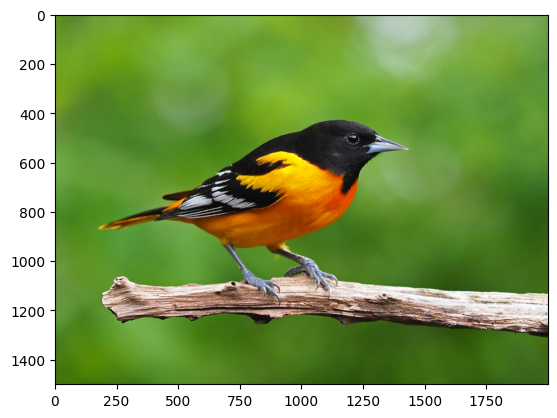

In [3]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('../bird.png')
plt.imshow(data)
plt.show()

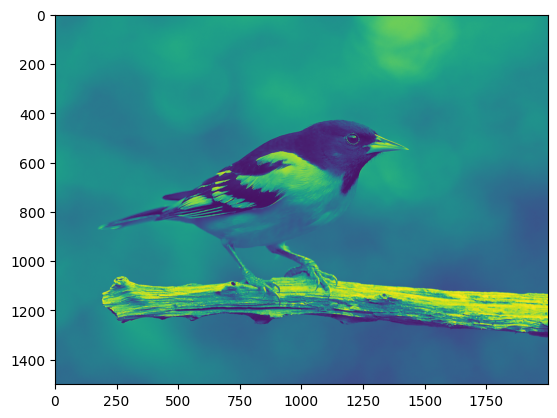

In [4]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('../bird.png', mode='F')
plt.imshow(data)
plt.show()

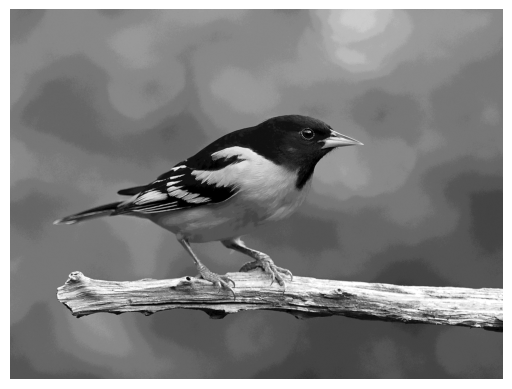

In [5]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import os

# Tạo thư mục nếu chưa có
os.makedirs('lab1_img', exist_ok=True)

# Đọc ảnh gốc từ thư mục cha
data = iio.imread('../bird.png', mode='F').astype(np.uint8)

# Lấy 4 bit cao của mỗi pixel
cl = data & 0xF0

# Lưu ảnh đã xử lý
iio.imsave('lab1_img/birdf0.png', cl)

# Đọc lại ảnh để hiển thị
tmp = iio.imread('lab1_img/birdf0.png')

# Hiển thị bằng matplotlib
plt.imshow(tmp, cmap='gray')
plt.axis('off')  # Ẩn trục cho đẹp
plt.show()


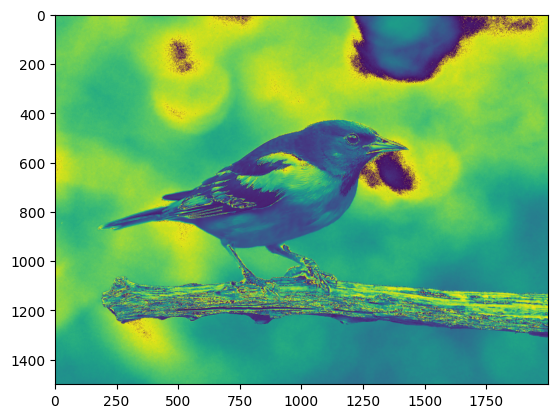

In [6]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt


data = iio.imread('../bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow(bdata)
plt.show()

In [7]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

a = colorsys.rgb_to_hsv(255, 0, 0)
print(a)
b = colorsys.rgb_to_hsv(1, 0, 0)
print(b)
c = colorsys.rgb_to_hsv(0, 255, 0)
print(c)
d = colorsys.hsv_to_rgb(1, 1, 255)
print(d)

(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(255, 0.0, 0.0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


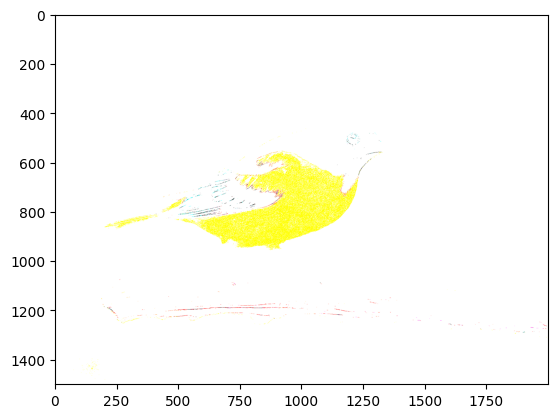

In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

rgb = iio.imread('../bird.png')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])
h *= h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv2rgb(h, s, v)
rgb2 = np.array(rgb2).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show()

[[119 119 119 ... 132 131 131]
 [119 119 119 ... 131 131 131]
 [120 120 119 ... 132 132 131]
 ...
 [ 89  89  89 ...  80  80  80]
 [ 89  89  89 ...  80  80  80]
 [ 90  89  89 ...  80  80  80]]


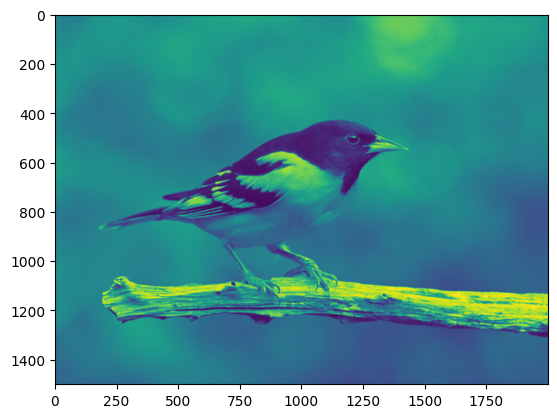

In [9]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

os.makedirs('lab1_img', exist_ok=True)


a = iio.imread('../bird.png', mode='F')


k = np.ones((5,5))/25


b = sn.convolve(a, k).astype(np.uint8)
iio.imwrite('lab1_img/bird_mean_filter.png', b)

print(b)
plt.imshow(b)
plt.show()

[[118 118 118 ... 131 131 131]
 [118 118 119 ... 131 131 131]
 [119 119 119 ... 132 131 131]
 ...
 [ 89  88  88 ...  81  81  81]
 [ 89  88  88 ...  80  81  81]
 [ 89  88  89 ...  80  80  81]]


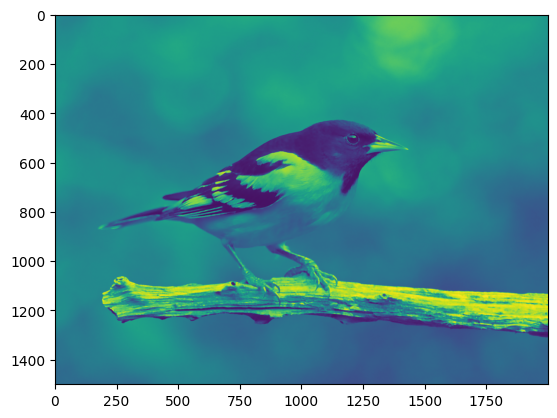

In [10]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

os.makedirs('lab1_img', exist_ok=True)


a = iio.imread('../bird.png', mode="F").astype(np.uint8)


b = sn.median_filter(a, size=5, footprint=None, output=None,
                      mode='reflect', cval=0.0, origin=0)

iio.imwrite('lab1_img/bird_median_filter.png', b)
# b is converted from an ndarray to an image
print(b)
plt.imshow(b)
plt.show()

[[121 121 121 ... 138 138 138]
 [128 128 128 ... 138 138 138]
 [128 128 128 ... 138 138 138]
 ...
 [ 96  96  96 ...  83  83  83]
 [ 96  96  96 ...  83  83  83]
 [ 96  96  96 ...  83  83  83]]


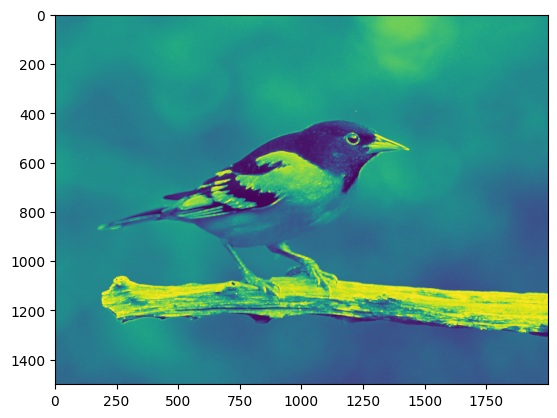

In [11]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

os.makedirs('lab1_img', exist_ok=True)

a = iio.imread('../bird.png', mode='F').astype(np.uint8)

b = sn.maximum_filter(a, size=5, footprint=None, output=None,
                      mode='reflect', cval=0.0, origin=0)

iio.imwrite('lab1_img/bird_max_filter.png', b)

print(b)
plt.imshow(b)
plt.show()

[[117 117 117 ... 127 127 127]
 [113 113 113 ... 127 127 127]
 [113 113 113 ... 127 127 127]
 ...
 [ 85  85  85 ...  76  76  76]
 [ 85  85  85 ...  76  76  76]
 [ 85  85  85 ...  78  78  78]]


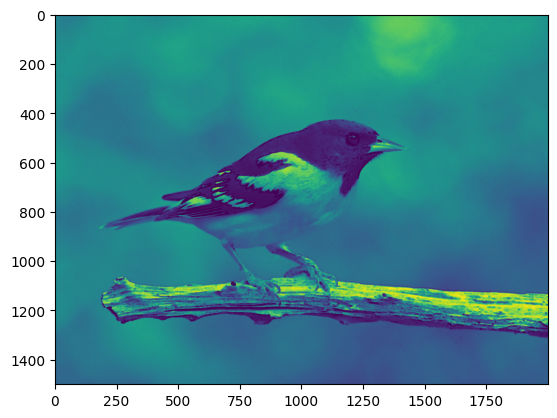

In [12]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys
os.makedirs('lab1_img', exist_ok=True)


a = iio.imread('../bird.png', mode="F").astype(np.uint8)

b = sn.minimum_filter(a, size=5, footprint=None, output=None,
                      mode='reflect', cval=0.0, origin=0)

iio.imwrite('lab1_img/bird_min_filter.png', b)

print(b)
plt.imshow(b)
plt.show()

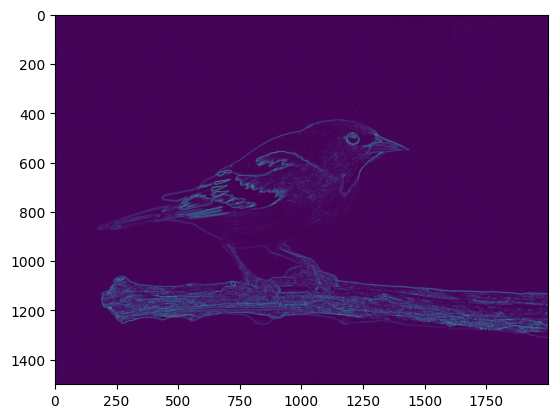

In [13]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys
os.makedirs('lab1_img', exist_ok=True)

# opening the image and converting it to grayscale
a = iio.imread('../bird.png', mode='F')
b = filters.sobel(a).astype(np.uint8)

iio.imwrite('lab1_img/bird_sobel_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()

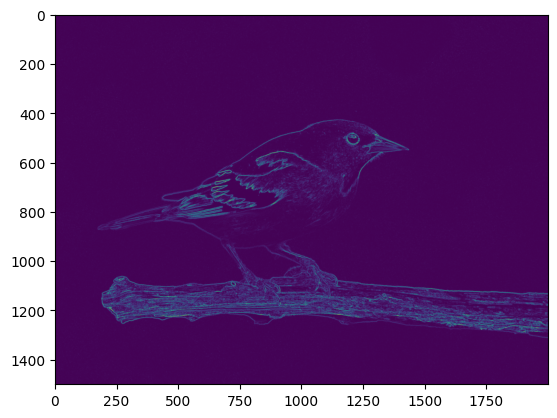

In [14]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys
os.makedirs('lab1_img', exist_ok=True)

a = iio.imread('../bird.png', mode="F")
b = filters.prewitt(a).astype(np.uint8)

iio.imwrite('lab1_img/bird_prewitt_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()

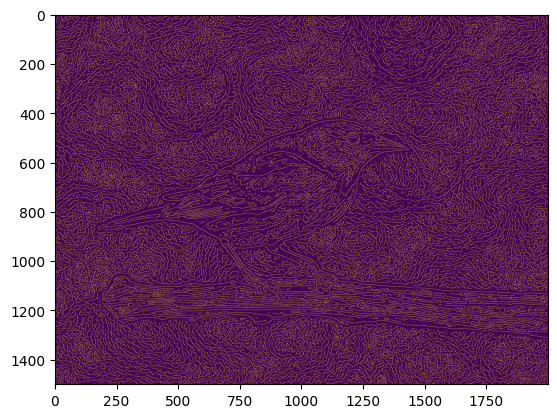

In [15]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import feature
import matplotlib.pylab as plt
import colorsys

os.makedirs('lab1_img', exist_ok=True)


# opening the image and converting it to grayscale
a = iio.imread('../bird.png', mode="F")
b = feature.canny(a, sigma=3).astype(np.uint8)

iio.imwrite('lab1_img/bird_canny_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()

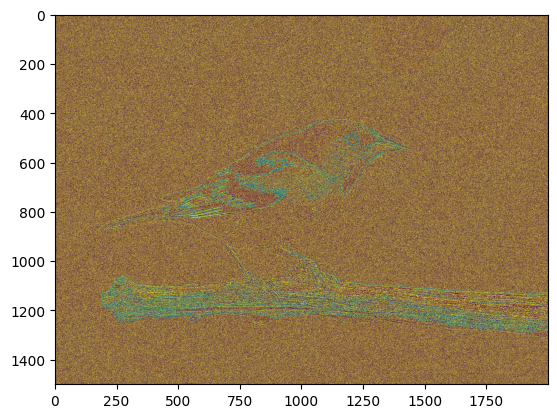

In [16]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys
os.makedirs('lab1_img', exist_ok=True)


# opening the image and converting it to grayscale
a = iio.imread('../bird.png', mode="F")
b = sn.laplace(a, mode='reflect').astype(np.uint8)

iio.imwrite('lab1_img/bird_laplace_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()